In [ ]:
!pip install -q ultralytics torch torchvision roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 124.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.4 MB/s eta 0:00:00


In [ ]:
import os
from ultralytics import YOLO
import torch
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)
print("GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

CUDA available: True
CUDA version: 12.4
GPU: Tesla T4


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="fXOGAkIOaCBMMrx0pgxg")
project = rf.workspace("my-personal-workspace-d84lu").project("yolo-fj4s3-gm7mf")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to YOLO-1 in yolov8:: 100%|██████████| 1350/1350 [00:00<00:00, 3330.24it/s]


In [ ]:
params = {
    "imgsz": 512,
    "epochs": 50,
    "batch": 16,
    "optimizer": "SGD",
    "patience": 50,
    "workers": 8,
    "max_det": 300,
    "momentum": 0.937,
    "iou": 0.7
}

In [ ]:
# مسیر فایل yaml دیتاست
dataset_yaml = "YOLO-1/data.yaml"

In [ ]:
model = YOLO('yolov8s.pt')

results = model.train(
    data=dataset_yaml,
    imgsz=params["imgsz"],
    epochs=params["epochs"],
    batch=params["batch"],
    optimizer=params["optimizer"],
    patience=params["patience"],
    workers=params["workers"],
    max_det=params["max_det"],
    momentum=params["momentum"],
    iou=params["iou"],
    device=0  # اگر GPU داری، در غیر این صورت device="cpu"
)

Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=YOLO-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=50, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=Fa

100%|██████████| 755k/755k [00:00<00:00, 91.6MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

Model summary: 129 layers, 11,135,987 parameters, 11,135,971 gradients, 28.6 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 213MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1302.3±417.3 MB/s, size: 40.2 KB)


train: Scanning /content/YOLO-1/train/labels... 579 images, 0 backgrounds, 0 corrupt: 100%|██████████| 579/579 [00:00<00:00, 2456.27it/s]

train: New cache created: /content/YOLO-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 724.5±338.3 MB/s, size: 32.9 KB)


val: Scanning /content/YOLO-1/valid/labels... 60 images, 1 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 1427.67it/s]

val: New cache created: /content/YOLO-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.31G      2.003      3.239          2          5        512: 100%|██████████| 37/37 [00:10<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         60         59      0.619      0.678      0.653        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.82G      1.872      1.552      1.811          4        512: 100%|██████████| 37/37 [00:08<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         60         59      0.682      0.582      0.592      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.86G      1.861      1.607      1.686          4        512: 100%|██████████| 37/37 [00:07<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         60         59      0.775      0.627      0.709      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.87G      1.871      1.526      1.539          9        512: 100%|██████████| 37/37 [00:07<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         60         59      0.888      0.695      0.778      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.91G      1.859      1.294       1.53          3        512: 100%|██████████| 37/37 [00:08<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]


                   all         60         59      0.776      0.729      0.755      0.322

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.93G      1.859      1.398      1.566          4        512: 100%|██████████| 37/37 [00:07<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         60         59      0.738      0.644       0.65      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.96G      1.805      1.368      1.573          7        512: 100%|██████████| 37/37 [00:07<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         60         59      0.782       0.79      0.812      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.97G      1.781      1.282      1.582          4        512: 100%|██████████| 37/37 [00:08<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]


                   all         60         59      0.758      0.743      0.779      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.01G      1.772      1.238      1.577          7        512: 100%|██████████| 37/37 [00:07<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         60         59      0.601      0.535      0.563      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.03G       1.75      1.143      1.551          5        512: 100%|██████████| 37/37 [00:08<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         60         59      0.786      0.814       0.74      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.05G      1.776      1.108      1.614          4        512: 100%|██████████| 37/37 [00:08<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         60         59      0.958      0.678      0.848      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.07G      1.782      1.157      1.612          4        512: 100%|██████████| 37/37 [00:08<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         60         59       0.93      0.797        0.9      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       3.1G      1.742       1.14      1.587          5        512: 100%|██████████| 37/37 [00:07<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

                   all         60         59      0.932      0.763      0.881      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.13G      1.733       1.13      1.579         10        512: 100%|██████████| 37/37 [00:08<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         60         59      0.874      0.823      0.906      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.15G      1.687      1.075      1.537          9        512: 100%|██████████| 37/37 [00:07<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         60         59      0.928      0.875      0.912        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.16G      1.726      1.076      1.526          4        512: 100%|██████████| 37/37 [00:07<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         60         59      0.884      0.729       0.85       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       3.2G       1.67      1.041      1.505          6        512: 100%|██████████| 37/37 [00:08<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         60         59      0.918      0.756      0.878      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.22G      1.665      1.022      1.518          4        512: 100%|██████████| 37/37 [00:07<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         60         59      0.879      0.881      0.912      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.25G      1.637      1.001      1.502          5        512: 100%|██████████| 37/37 [00:07<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         60         59      0.961      0.838      0.938      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.26G      1.637     0.9574      1.472          5        512: 100%|██████████| 37/37 [00:08<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         60         59      0.915      0.847      0.929      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       3.3G      1.635     0.9919      1.505          5        512: 100%|██████████| 37/37 [00:07<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         60         59      0.899      0.864      0.949      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.32G      1.598     0.9464      1.462          3        512: 100%|██████████| 37/37 [00:07<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.11it/s]

                   all         60         59      0.854      0.915      0.942      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.35G      1.601     0.8988      1.458          4        512: 100%|██████████| 37/37 [00:08<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]

                   all         60         59      0.912      0.875      0.907      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.36G      1.597     0.9487       1.48          5        512: 100%|██████████| 37/37 [00:07<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         60         59      0.945      0.867      0.925      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.39G      1.569     0.9241      1.457          3        512: 100%|██████████| 37/37 [00:07<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         60         59      0.904      0.898      0.928      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.63G      1.522     0.8729      1.433          4        512: 100%|██████████| 37/37 [00:08<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         60         59      0.961      0.834      0.929      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.66G      1.518     0.8981      1.435          3        512: 100%|██████████| 37/37 [00:07<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         60         59      0.919      0.898      0.947      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.67G      1.516     0.8714      1.419          5        512: 100%|██████████| 37/37 [00:07<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]


                   all         60         59      0.913      0.888      0.933      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.71G      1.459     0.8084      1.402          4        512: 100%|██████████| 37/37 [00:08<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]

                   all         60         59      0.944      0.881      0.936       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.73G      1.487     0.8367       1.41          5        512: 100%|██████████| 37/37 [00:07<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         60         59      0.932      0.881      0.947      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.75G      1.468     0.8211      1.388          9        512: 100%|██████████| 37/37 [00:07<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         60         59      0.961      0.898      0.946      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.76G      1.449      0.796      1.386          4        512: 100%|██████████| 37/37 [00:08<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.77it/s]

                   all         60         59      0.872      0.924      0.941      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       3.8G      1.391     0.7913       1.37          5        512: 100%|██████████| 37/37 [00:07<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.69it/s]

                   all         60         59      0.914      0.898      0.942      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.04G       1.42     0.7781      1.384          5        512: 100%|██████████| 37/37 [00:07<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         60         59       0.91      0.864      0.915      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.06G      1.375     0.7904      1.355          4        512: 100%|██████████| 37/37 [00:08<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         60         59      0.927      0.898      0.944      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.07G      1.375     0.7512      1.345          5        512: 100%|██████████| 37/37 [00:08<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         60         59      0.963       0.89      0.955      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.11G      1.339     0.7495      1.327          6        512: 100%|██████████| 37/37 [00:07<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         60         59      0.889      0.946      0.957      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.14G      1.298     0.7202        1.3          6        512: 100%|██████████| 37/37 [00:08<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         60         59      0.982      0.931      0.953      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.16G      1.325     0.7364      1.318          9        512: 100%|██████████| 37/37 [00:07<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         60         59      0.945      0.877      0.917      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.17G      1.312     0.6828      1.297          5        512: 100%|██████████| 37/37 [00:07<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         60         59      0.962      0.867      0.945      0.421


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.21G      1.276     0.5806      1.278          3        512: 100%|██████████| 37/37 [00:09<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         60         59      0.946      0.898      0.944      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.23G      1.267     0.5891      1.283          3        512: 100%|██████████| 37/37 [00:07<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         60         59      0.981      0.915      0.949      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.26G      1.188     0.5488       1.25          3        512: 100%|██████████| 37/37 [00:07<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]


                   all         60         59      0.965      0.926      0.958      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.27G      1.195     0.5419      1.259          3        512: 100%|██████████| 37/37 [00:07<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         60         59      0.982       0.93      0.957      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.31G      1.195     0.5437      1.264          3        512: 100%|██████████| 37/37 [00:07<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.89it/s]

                   all         60         59      0.949      0.915      0.954      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.33G      1.129     0.5221      1.227          3        512: 100%|██████████| 37/37 [00:07<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]

                   all         60         59      0.959      0.949      0.956      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.57G      1.168     0.5174      1.241          3        512: 100%|██████████| 37/37 [00:08<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         60         59      0.954      0.949      0.958      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.58G      1.129     0.5276      1.225          3        512: 100%|██████████| 37/37 [00:07<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         60         59      0.982      0.943      0.961       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.62G      1.089     0.4836      1.206          3        512: 100%|██████████| 37/37 [00:07<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         60         59      0.964      0.912      0.942      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.64G       1.08     0.4941      1.203          3        512: 100%|██████████| 37/37 [00:08<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         60         59      0.964      0.897       0.94      0.439



50 epochs completed in 0.122 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]


                   all         60         59      0.854      0.915      0.942      0.458
Speed: 0.1ms preprocess, 3.4ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train


In [ ]:
results.plot()
plt.show()

AttributeError: 'DetMetrics' object has no attribute 'plot'. See valid attributes below.

    Utility class for computing detection metrics such as precision, recall, and mean average precision (mAP).

    Attributes:
        names (Dict[int, str]): A dictionary of class names.
        box (Metric): An instance of the Metric class for storing detection results.
        speed (Dict[str, float]): A dictionary for storing execution times of different parts of the detection process.
        task (str): The task type, set to 'detect'.
        stats (Dict[str, List]): A dictionary containing lists for true positives, confidence scores, predicted classes, target classes, and target images.
        nt_per_class: Number of targets per class.
        nt_per_image: Number of targets per image.
    

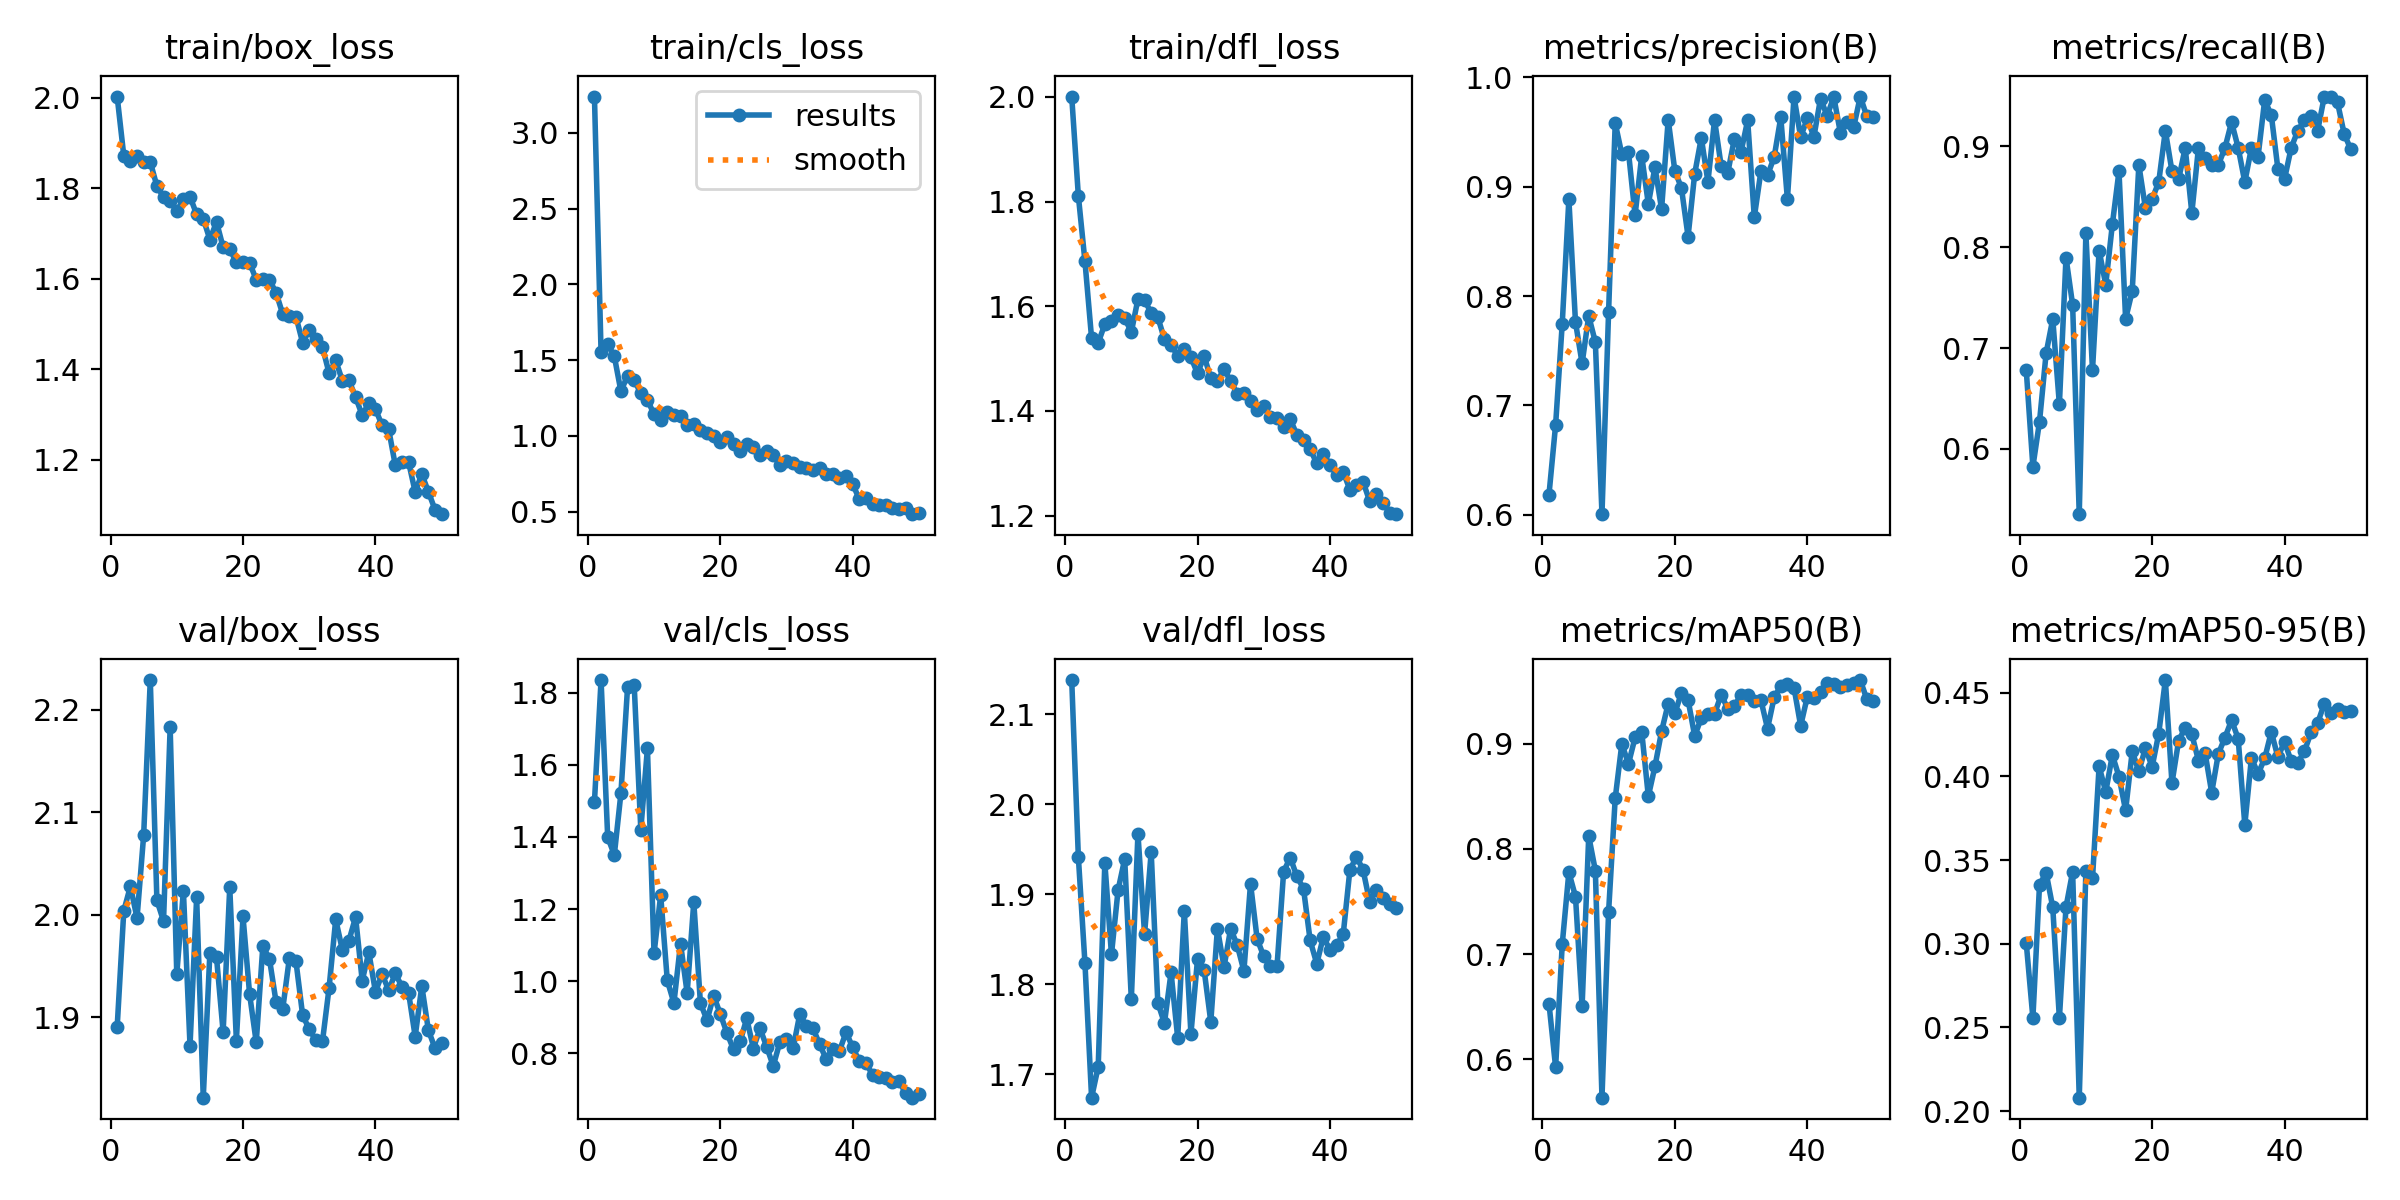

In [ ]:
from IPython.display import Image, display

# Display the training plot
display(Image(filename='runs/detect/train/results.png'))

In [ ]:
metrics = model.val(data=dataset_yaml, imgsz=params["imgsz"], batch=params["batch"])
print(metrics)

Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 640.4±233.6 MB/s, size: 31.9 KB)


val: Scanning /content/YOLO-1/valid/labels.cache... 60 images, 1 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]


                   all         60         59      0.854      0.915      0.942      0.457
Speed: 2.6ms preprocess, 9.9ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x797e673a9fd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033

In [ ]:
from ultralytics.utils.plotting import plot_results
plot_results('runs/detect/train/results.csv')

In [ ]:
metrics.confusion_matrix.plot()

In [ ]:
results = model.predict('YOLO-1/test/images/y76_jpg.rf.9157d1b89ba0ac6b94cbc078bd180f5d.jpg', save=True, conf=0.25)


image 1/1 /content/YOLO-1/test/images/y76_jpg.rf.9157d1b89ba0ac6b94cbc078bd180f5d.jpg: 512x512 1 tumor, 12.7ms
Speed: 2.2ms preprocess, 12.7ms inference, 2.2ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs/detect/train4


# Another Faster R-CNN Exp

In [ ]:
# (This is an example, your code might be slightly different)
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# Load a pre-trained model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights='DEFAULT')

# Get the number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# Replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes=2) # num_classes = background + tumor


In [ ]:
import torch
from torchmetrics.detection import MeanAveragePrecision
import time

# --- Hyperparameters ---
NUM_EPOCHS = 30
LEARNING_RATE = 0.001
LR_STEP_SIZE = 10
LR_GAMMA = 0.1

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# --- Ensure model is on the correct device ---
# We assume 'model' is now a freshly initialized model in your environment
# after you re-ran your model definition cell.
model.to(device)

# --- Setup Optimizer and Scheduler ---
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=LR_STEP_SIZE, gamma=LR_GAMMA)

# Variables to track the best model
best_map = -1.0
best_model_weights = None

print("--- Starting Experiment 2 (Corrected): 30 Epochs with LR Scheduler ---")

# --- Main Training and Evaluation Loop ---
for epoch in range(NUM_EPOCHS):
    start_time = time.time()

    # --- Training Phase ---
    model.train()
    total_train_loss = 0
    for i, (images, targets) in enumerate(train_data_loader):
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        total_train_loss += losses.item()

    avg_train_loss = total_train_loss / len(train_data_loader)

    # Update the learning rate
    lr_scheduler.step()

    # --- Validation Phase ---
    model.eval()
    metric = MeanAveragePrecision(box_format='xyxy')
    with torch.no_grad():
        for images, targets in valid_data_loader:
            images = list(img.to(device) for img in images)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            predictions = model(images)
            metric.update(predictions, targets)

    results = metric.compute()
    current_map = results['map'].item()

    # --- Epoch Summary ---
    epoch_time = time.time() - start_time
    print(
        f"Epoch {epoch+1}/{NUM_EPOCHS} | "
        f"Time: {epoch_time:.1f}s | "
        f"Train Loss: {avg_train_loss:.4f} | "
        f"Validation mAP: {current_map:.4f}"
    )

    # Check if this is the best model so far
    if current_map > best_map:
        best_map = current_map
        best_model_weights = model.state_dict()
        print(f"*** New best model found! mAP: {best_map:.4f} at epoch {epoch+1} ***")

print("--- Finished Training ---")
print(f"Best Validation mAP achieved: {best_map:.4f}")

# Load the best performing model weights for future use
if best_model_weights:
    model.load_state_dict(best_model_weights)


--- Starting Experiment 2 (Corrected): 30 Epochs with LR Scheduler ---
Epoch 1/30 | Time: 122.0s | Train Loss: 0.7517 | Validation mAP: 0.0133
*** New best model found! mAP: 0.0133 at epoch 1 ***
Epoch 2/30 | Time: 121.9s | Train Loss: 0.2388 | Validation mAP: 0.0338
*** New best model found! mAP: 0.0338 at epoch 2 ***
Epoch 3/30 | Time: 122.2s | Train Loss: 0.2431 | Validation mAP: 0.1328
*** New best model found! mAP: 0.1328 at epoch 3 ***
Epoch 4/30 | Time: 121.9s | Train Loss: 0.2343 | Validation mAP: 0.0814
Epoch 5/30 | Time: 121.8s | Train Loss: 0.2380 | Validation mAP: 0.1050
Epoch 6/30 | Time: 122.3s | Train Loss: 0.2242 | Validation mAP: 0.1228
Epoch 7/30 | Time: 122.5s | Train Loss: 0.2284 | Validation mAP: 0.1225
Epoch 8/30 | Time: 122.7s | Train Loss: 0.2186 | Validation mAP: 0.1273
Epoch 9/30 | Time: 122.9s | Train Loss: 0.2156 | Validation mAP: 0.1272
Epoch 10/30 | Time: 122.5s | Train Loss: 0.2151 | Validation mAP: 0.1879
*** New best model found! mAP: 0.1879 at epoch 10

--- Visualizing Model Predictions on Validation Set (Corrected) ---


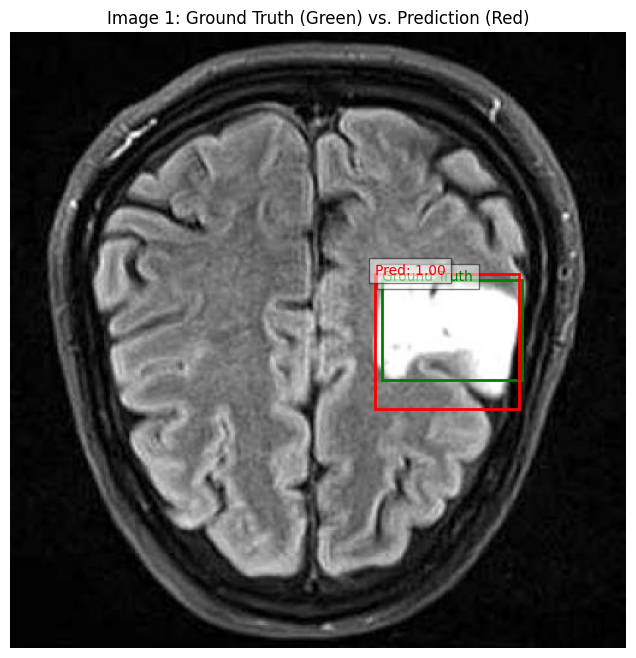

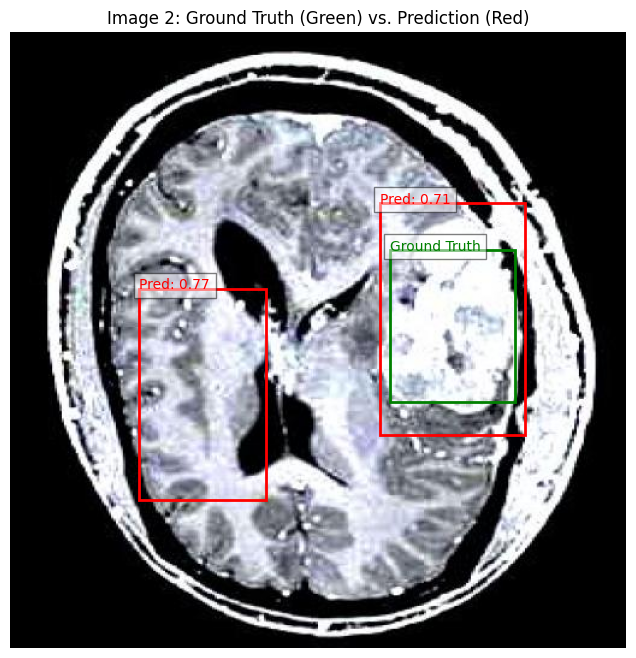

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import random

# --- Visualization Function (Corrected) ---
def visualize_predictions(model, data_loader, device, num_images=5):
    """
    Picks random images from a data loader, runs them through the model,
    and displays the ground truth and predicted bounding boxes.
    """
    model.eval()

    # Get a batch of images and targets
    images, targets = next(iter(data_loader))

    # Pick random images from the batch
    indices = random.sample(range(len(images)), k=min(num_images, len(images)))

    # Move images and model to the correct device
    images_for_model = [images[i].to(device) for i in indices]
    model.to(device)

    # Get predictions
    with torch.no_grad():
        predictions = model(images_for_model)

    # --- Plotting ---
    for i, (pred_dict, original_idx) in enumerate(zip(predictions, indices)):
        # Use the original, un-moved image for plotting
        image_tensor = images[original_idx]
        image_display = image_tensor.permute(1, 2, 0) # CHW -> HWC

        fig, ax = plt.subplots(1, figsize=(10, 8))
        ax.imshow(image_display)

        # --- Draw Ground Truth Boxes (in Green) ---
        true_boxes = targets[original_idx]['boxes']
        for box in true_boxes:
            xmin, ymin, xmax, ymax = box
            rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 linewidth=2, edgecolor='g', facecolor='none')
            ax.add_patch(rect)
            ax.text(xmin, ymin, 'Ground Truth', color='g', bbox=dict(facecolor='white', alpha=0.5))

        # --- Draw Predicted Boxes (in Red) ---
        # *** THE FIX IS HERE: Move predictions to CPU ***
        pred_boxes = pred_dict['boxes'].cpu()
        pred_scores = pred_dict['scores'].cpu()

        # Filter out low-confidence predictions
        for box, score in zip(pred_boxes, pred_scores):
            if score > 0.5: # Confidence threshold
                xmin, ymin, xmax, ymax = box
                rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                     linewidth=2, edgecolor='r', facecolor='none')
                ax.add_patch(rect)
                ax.text(xmin, ymin, f'Pred: {score:.2f}', color='r', bbox=dict(facecolor='white', alpha=0.5))

        ax.set_title(f"Image {i+1}: Ground Truth (Green) vs. Prediction (Red)")
        plt.axis('off')
        plt.show()

# --- Run the visualization ---
print("--- Visualizing Model Predictions on Validation Set (Corrected) ---")
visualize_predictions(model, valid_data_loader, device, num_images=30)
